## ProtVec: A Continuous Distributed Representation of Biological Sequences

[Asgari and Mofrad (2015)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0141287)

### **Based on Word2Vec algorithm**  
[Word2Vec tutorial](https://www.tensorflow.org/tutorials/word2vec) and [Word2Vec summary](https://en.wikipedia.org/wiki/Word2vec )  


- computationally-efficient predictive model for learning word embeddings from raw text
- reconstruct linguistic contexts of words

- Continuous Bag-of-Words model (CBOW) and the Skip-gram model


- CBOW predicts target words (e.g. 'mat') from source context words
- Skip-gram does the inverse and predicts source context words from the target words



- Continuous Bag-of-Words model (CBOW) and the Skip-gram model (window size = 2)


- CBOW predicts target words (e.g. 'mat') from source context words
- Skip-gram does the inverse and predicts source context words from the target words

    
![Alt text](figures/Skip_gram_cbow.png)
    

- words are represented as vectors
  - closely related words are also close in vector space

![Alt text](figures/relationships_plus_vectors2.png)

![Alt text](figures/proteinsequence.png)

![Alt text](figures/protein_words.png)

![Alt text](figures/Protein_sentences.png)

![Alt text](figures/Protein_sentences2.png)

# Definitions:

![Alt text](figures/table_overview_vocab2.png)

In [1]:
import sys

Word2vec representation of proteins

In [2]:
sys.path.append('./')

from helpers import nGram, DfVec

[Biovec: Github repository](https://github.com/kyu999/biovec)  


In [3]:
sys.path.append('./biovec')

In [4]:
import biovec

In [5]:
nGram(biovec.models.split_ngrams('ATATQSQSMTEELIPDFTPALQ',3))

n-gram with 3 sentences

Load protein sequence file, generate corpus and train word2vec model

In [6]:
# train on 500 protein sequences
pv = biovec.ProtVec('data/uniprot_sprot_small.fasta')

Generate Corpus file from fasta file...
......................................................................................

Save model to outputfile

In [7]:
pv.save('trained_models/model_SwissProt_small')

**Load model trained on whole SwissProt**

In [8]:
pv2 = biovec.models.load_protvec('trained_models/swissprot_reviewed_protvec')

**Number of unique triplets in SwissProt protein sequences**
- 551,754 proteins as of 14/07/2016

In [9]:
pv2.corpus_count

19602

In [10]:
for word, vocab_obj in pv2.wv.vocab.items()[:10]:
    print(word, vocab_obj.count)
    

(u'HEL', 25379)
(u'HEM', 6270)
(u'HEN', 10164)
(u'SPX', 14)
(u'SPY', 19716)
(u'SPZ', 2)
(u'SPP', 35834)
(u'SPQ', 28341)
(u'SPR', 33820)
(u'SPS', 58983)


Use model to generate vector for 3-gram ("word")

In [11]:
pv["SDS"]

array([ 0.07199927, -0.17778611, -0.21824333,  0.27787745,  0.05371263,
       -0.10400327,  0.02377583, -0.0887413 , -0.06109211, -0.05816383,
        0.06203544, -0.02728248, -0.130863  ,  0.11067314,  0.02590071,
       -0.02414334, -0.17260185, -0.09142881, -0.15863536,  0.25554031,
        0.18589509,  0.26383272, -0.17130192, -0.06085125,  0.06586117,
        0.29733598,  0.08048982,  0.0138846 ,  0.00434317,  0.07395428,
       -0.06488879, -0.04518017, -0.05234578, -0.0608374 , -0.01443057,
       -0.1358099 , -0.05305588, -0.07165639, -0.08355775,  0.08682172,
       -0.11579227,  0.17069615, -0.12699088, -0.06393623, -0.25057083,
        0.05186024,  0.03241514, -0.05236005,  0.0952641 , -0.09119482,
        0.00891929, -0.0472044 ,  0.20187795,  0.1509369 , -0.02013177,
       -0.15396126, -0.17301483, -0.1410501 , -0.04455834,  0.05537254,
        0.009409  , -0.09073627,  0.02759676, -0.00838915, -0.15126441,
       -0.21351872,  0.03616622, -0.02116963, -0.14021651, -0.16

Encode protein as sum of possible sentences

In [12]:
sum(pv2.to_vecs("ATATQSQSMTEELIPDFTPALQ"))

array([  4.68553257e+00,  -2.75733203e-01,  -6.00899935e-01,
        -2.32942414e+00,   3.69190884e+00,   1.20364714e+00,
         3.21482921e+00,   8.26907039e-01,  -2.80144858e+00,
         4.24059296e+00,   2.33630538e+00,   1.99242878e+00,
        -1.75492674e-01,  -1.36675763e+00,  -1.37515903e-01,
        -3.05941582e+00,   6.12935245e-01,  -2.91317677e+00,
        -3.39738178e+00,  -2.10831833e+00,  -2.32825470e+00,
        -6.69668794e-01,  -3.03118372e+00,   6.32648051e-01,
        -4.99482453e-03,  -2.73134887e-01,  -4.11112309e+00,
         4.59184027e+00,   4.11478877e-01,   9.35785472e-04,
        -4.73659337e-01,  -7.85629377e-02,   2.17600250e+00,
         1.62492299e+00,   1.04783225e+00,  -1.37927711e-01,
         1.78160560e+00,   1.92866004e+00,   1.85238868e-02,
         2.07188654e+00,   3.56623411e+00,   1.03589153e+00,
         2.29612327e+00,   6.40555024e-01,  -9.52317059e-01,
         6.12652206e+00,  -5.67247868e+00,  -5.70953250e-01,
        -1.52678132e+00,

# Paper Results:
- n-grams with similar properties are also close in vector space
- family classification with vector representation: 93 % weigthed accuracy

### Import protein information for encoding as vectors

In [13]:
import pandas as pd

Load data set

In [14]:
infile = 'data/family_classification_and_sequence_small.tab'


In [15]:
df = pd.read_csv(infile,delimiter='\t')

In [16]:
df.head(3)

,Unnamed: 0,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence
0,0,Q65P94,R14Z1_BACLD,30S ribosomal protein S14 type Z 1,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKKSMIAKQKRTPKFKVQEYTRCERCGRPHSVIRKFKLCRICFRE...
1,1,Q65IJ4,R14Z2_BACLD,30S ribosomal protein S14 type Z 2,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKTSMIVKQKREQKFKVREYTRCERCGRPHSVIRKFKLCRICFRE...
2,2,Q3V536,RR14_ACOCL,"30S ribosomal protein S14, chloroplastic",Ribosomal_S14,Ribosomal protein S14p/S29e,MARKGLIEREKKRKKLEQKYHSIRGSSKKEIRKVPSLSDKWEIHGK...


Generate vectors for protein sequences

In [17]:
all_vectors = []
i=0
    
for sequence in df['sequence']:

    try:
        vector = DfVec(sum(pv2.to_vecs(sequence)))
        all_vectors.append(vector) # split strings after whitespace

    except:
        i+=1
        pass
    
print('number of proteins skipped: ',i)
        
df['Protein_vector'] = all_vectors # safe unique words in df

('number of proteins skipped: ', 0)


In [18]:
df.head(2)

,Unnamed: 0,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence,Protein_vector
0,0,Q65P94,R14Z1_BACLD,30S ribosomal protein S14 type Z 1,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKKSMIAKQKRTPKFKVQEYTRCERCGRPHSVIRKFKLCRICFRE...,100 dimensional vector
1,1,Q65IJ4,R14Z2_BACLD,30S ribosomal protein S14 type Z 2,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKTSMIVKQKREQKFKVREYTRCERCGRPHSVIRKFKLCRICFRE...,100 dimensional vector


# Cluster proteins by classes

1) Proteins in same class are also close in vector space

##### Apply PCA and t-SNE to reduce dimensionality

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from __future__ import print_function
% matplotlib inline
import numpy as np

In [20]:
vector_array =[x.vec for x in df['Protein_vector']]

In [21]:
from datetime import datetime
startTime = datetime.now()

pca_model = PCA(n_components=30,random_state=0)
tsne_model = TSNE(n_components=2, random_state=0,perplexity=30, n_iter=1000)
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform(vector_array))
print (datetime.now() - startTime)

0:00:22.599605


Save result of PCA / t-SNE in dataframe

In [22]:
df['PCA-t-SNE-c1'] = tsne_pca.T[0]
df['PCA-t-SNE-c2'] = tsne_pca.T[1]

Encode class string as integer

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()
encoder.fit(df['FamilyID'])
encoded_y = encoder.transform(df['FamilyID'])
df['class'] = encoded_y

In [25]:
encoded_y

array([2, 2, 2, ..., 0, 0, 0])

Plot PCA / t-SNE result by predicted classes

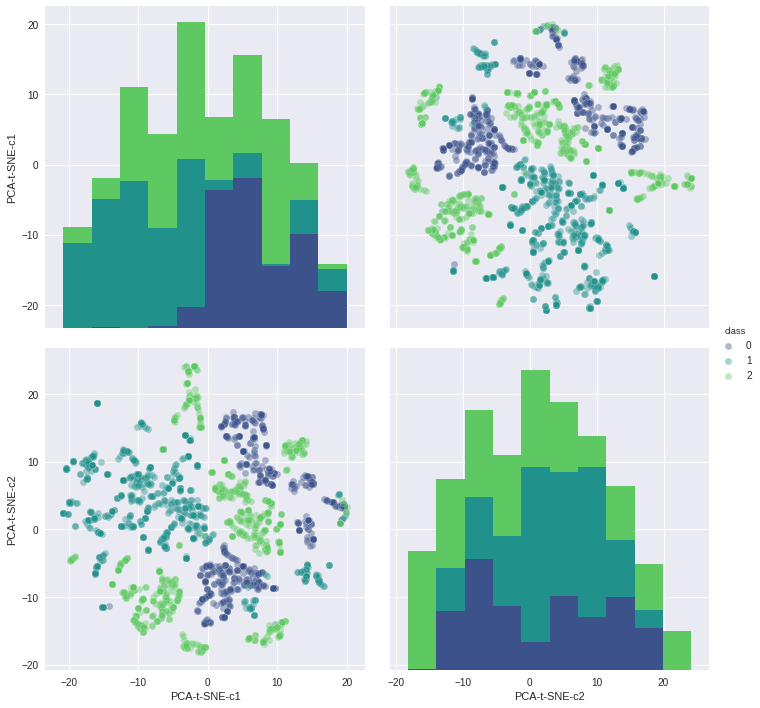

In [26]:
sns.pairplot(df, hue='class', vars=['PCA-t-SNE-c1', 'PCA-t-SNE-c2'], palette='viridis', 
             size=5, markers='o', plot_kws={'alpha':0.4});

### Prepare deep learning for protein classification

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

Using TensorFlow backend.


Transform vectors in numpy array and save protein classes

In [46]:
df_subset = df.iloc[::1, :] # takes every x-th value in df

In [47]:
X = np.array([x.vec for x in df_subset['Protein_vector']])
y = df_subset['class']

In [48]:
df.head(4)

,Unnamed: 0,SwissProtAccessionID,LongID,ProteinName,FamilyID,FamilyDescription,sequence,Protein_vector,PCA-t-SNE-c1,PCA-t-SNE-c2,class
0,0,Q65P94,R14Z1_BACLD,30S ribosomal protein S14 type Z 1,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKKSMIAKQKRTPKFKVQEYTRCERCGRPHSVIRKFKLCRICFRE...,100 dimensional vector,-11.926635,-4.509303,2
1,1,Q65IJ4,R14Z2_BACLD,30S ribosomal protein S14 type Z 2,Ribosomal_S14,Ribosomal protein S14p/S29e,MAKTSMIVKQKREQKFKVREYTRCERCGRPHSVIRKFKLCRICFRE...,100 dimensional vector,-11.677188,-4.321228,2
2,2,Q3V536,RR14_ACOCL,"30S ribosomal protein S14, chloroplastic",Ribosomal_S14,Ribosomal protein S14p/S29e,MARKGLIEREKKRKKLEQKYHSIRGSSKKEIRKVPSLSDKWEIHGK...,100 dimensional vector,13.730684,12.500207,2
3,3,Q85FM1,RR14_ADICA,"30S ribosomal protein S14, chloroplastic",Ribosomal_S14,Ribosomal protein S14p/S29e,MAKKSLIEKENSKKKLVKKYNLLRQFLRREIKNSLRIQDKLIISEK...,100 dimensional vector,3.863322,5.931167,2


In [49]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(y)

In [50]:
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [51]:
dummy_y[:10]

array([[ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

Define deep learning model

In [52]:
def baseline_model():
    # create model
    model = Sequential()
    # input layer
    model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    # hidden layer
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

Define model settings

In [53]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=50, batch_size=32, verbose=0)

In [54]:
estimator

Define number of crossvalidation

In [55]:
kfold = KFold(n_splits=5, shuffle=True)

Predict probabilities for classes

In [56]:
startTime = datetime.now()

proba = cross_val_predict(estimator, X, dummy_y, cv=kfold, method='predict_proba')
print (datetime.now() - startTime)


0:00:21.593292


Get predicted class

In [57]:
prob_class = list()

for X in proba:
    
    new_class = np.argmax(X)
    prob_class.append(new_class)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('talk', font_scale=2)
from helpers import confusion_matrix_plot

In [59]:
probs = np.asarray(prob_class)

In [60]:
probs

array([2, 2, 2, ..., 0, 0, 0])

In [61]:
print("Prediction accuracy: %.2f%%" % (accuracy_score(df_subset['class'], probs)*100))

Prediction accuracy: 97.43%


Get confusion matrix of prediction

In [62]:
cm = confusion_matrix(df_subset['class'], prob_class,labels=[0, 1, 2])

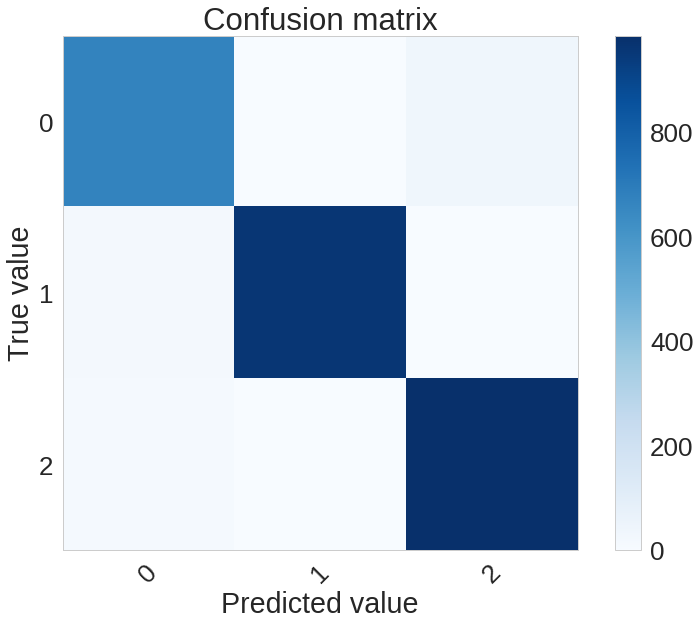

In [63]:
confusion_matrix_plot(cm, names=[0,1,2]);



Copyright (C) 2017 by Sabrina Jaeger and Samo Turk, BioMed X GmbH

This work is licensed under the Creative Commons Attribution-ShareAlike 4.0 License. To view a copy of this license, visit https://creativecommons.org/licenses/by-sa/4.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
